In [17]:
from torchmetrics.functional import structural_similarity_index_measure
from torchmetrics.image import PeakSignalNoiseRatio
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
import re 
import json 
import os
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt 

types = ['benchmark', 'every', 'gamma', 'noise-std', 'orientation', 'blue-noise', 'green-noise', 'red-noise', 'pos-orient', 'position', 'range', 'saturation']
types_dict = {type: {} for type in types}

file_path = r'C:\Stuff\Results\metrics\stump_ngp_opt_on_metrics.npy'
data = np.load(file_path, allow_pickle=True).item()

for k,v in data.items():
    for type in types:
        if type in k:
            types_dict[type][k] = v

benchmark_psnr = types_dict['benchmark']['stump-benchmark']['PSNR']
benchmark_ssim = types_dict['benchmark']['stump-benchmark']['SSIM']
benchmark_lpips = types_dict['benchmark']['stump-benchmark']['LPIPS']

benchmark
stump-every
stump-gamma
stump-noise-std
stump-orientation-std
stump-pns-blue-noise-percent
stump-pns-green-noise-percent


C:\Users\danko\AppData\Local\Temp\ipykernel_17012\2507936390.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 5))


stump-pns-red-noise-percent
stump-pos-orient-std
stump-position-std
stump-range
stump-saturation-std


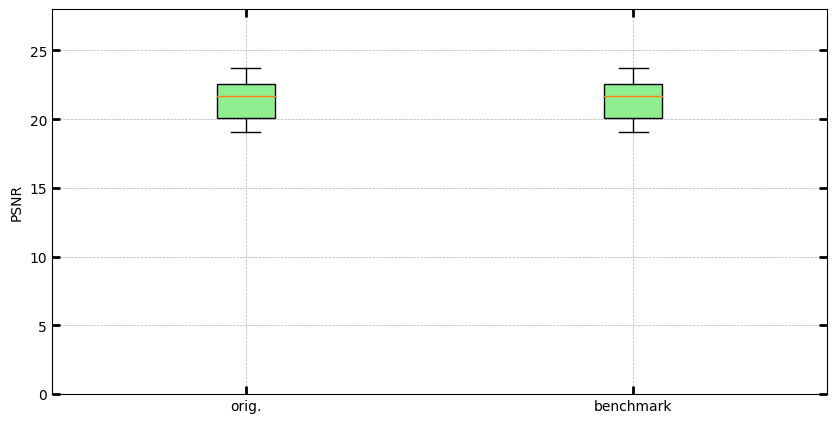

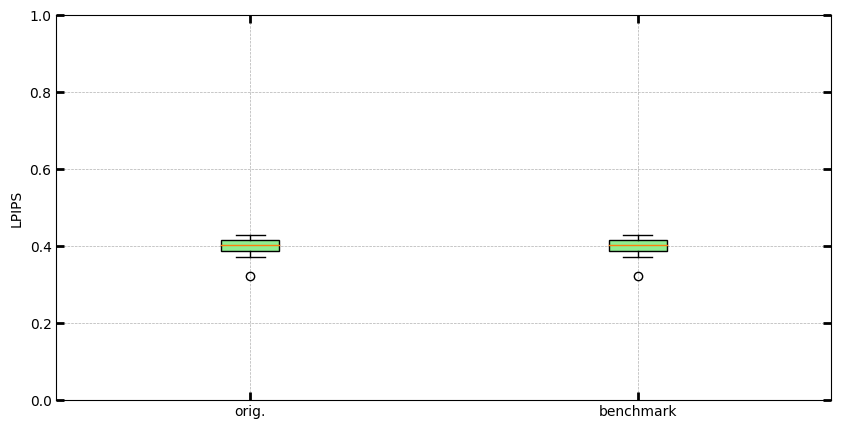

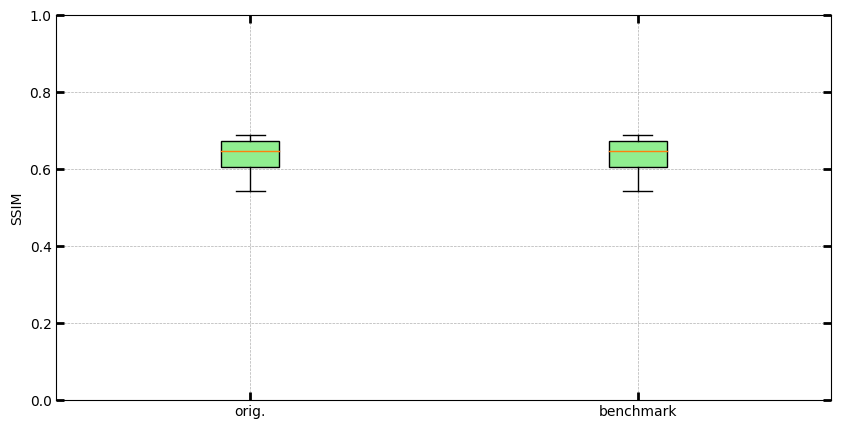

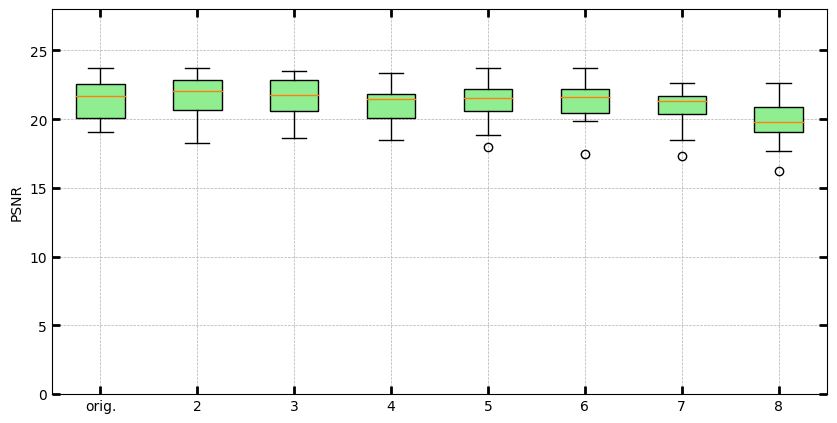

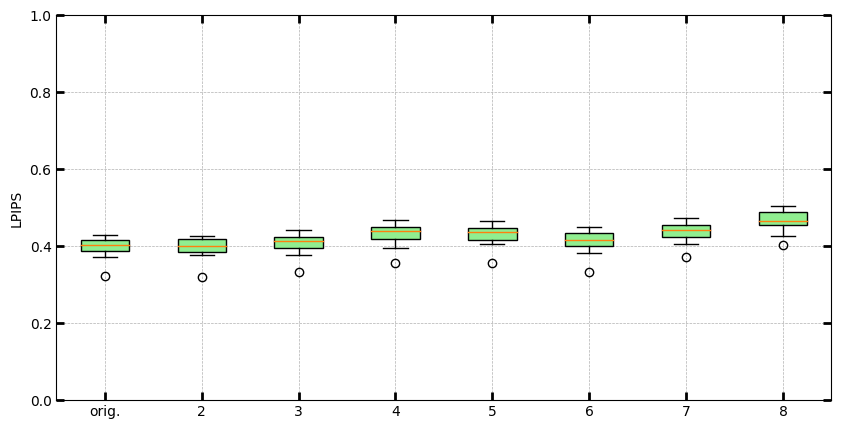

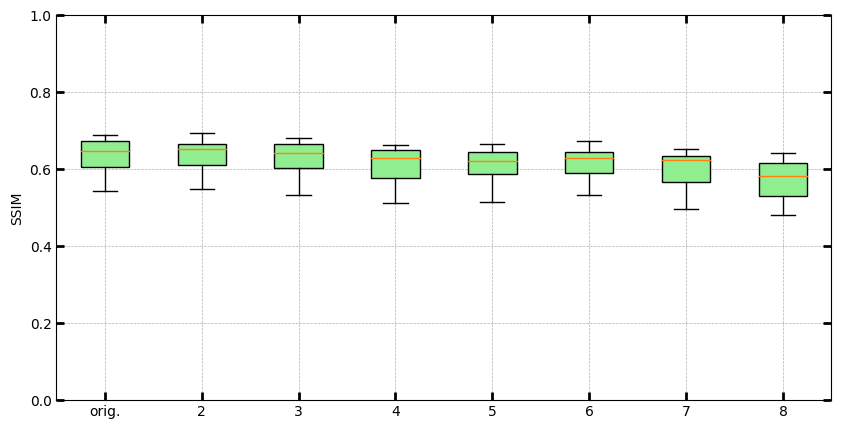

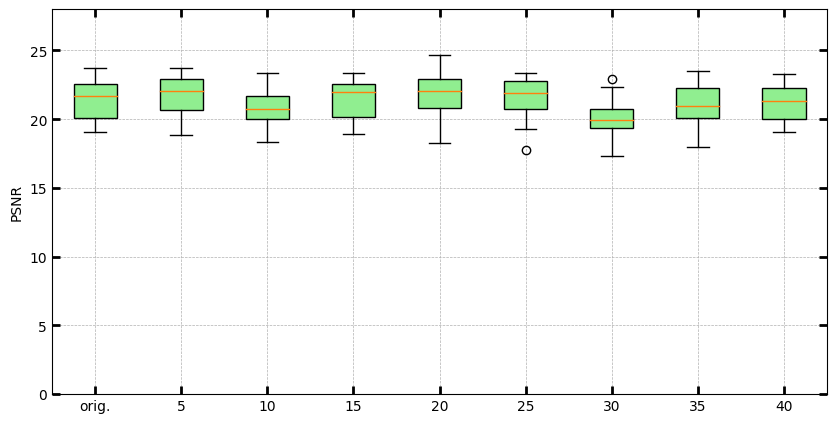

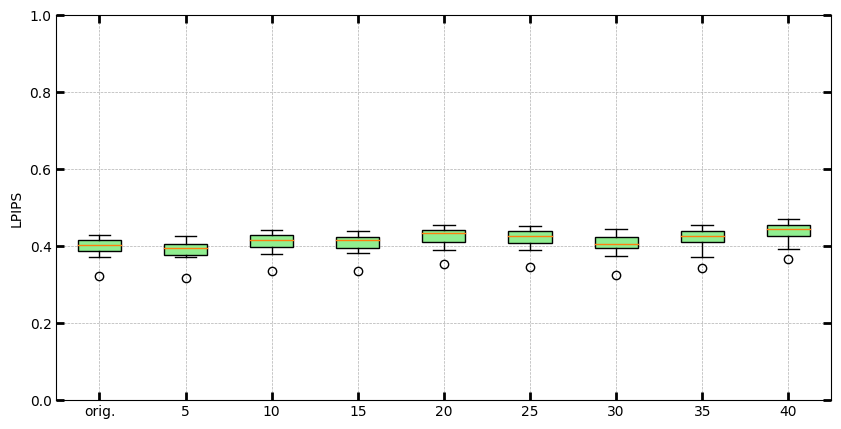

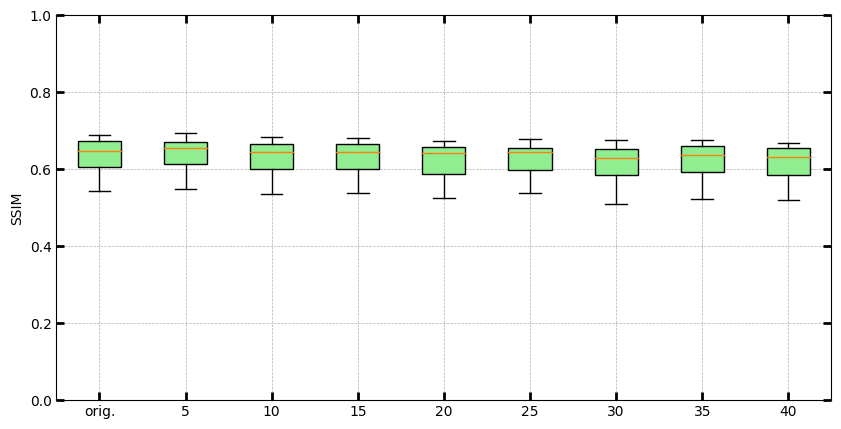

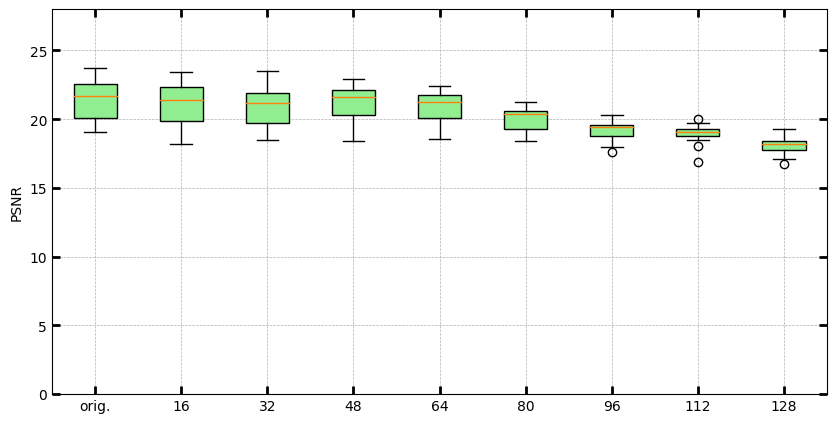

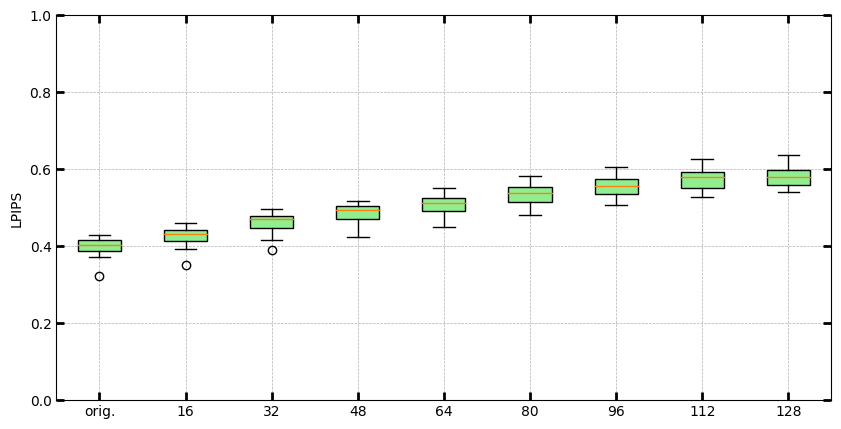

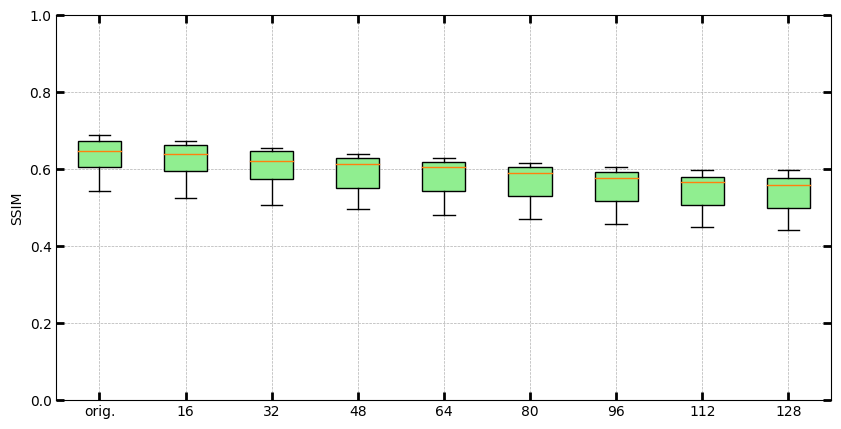

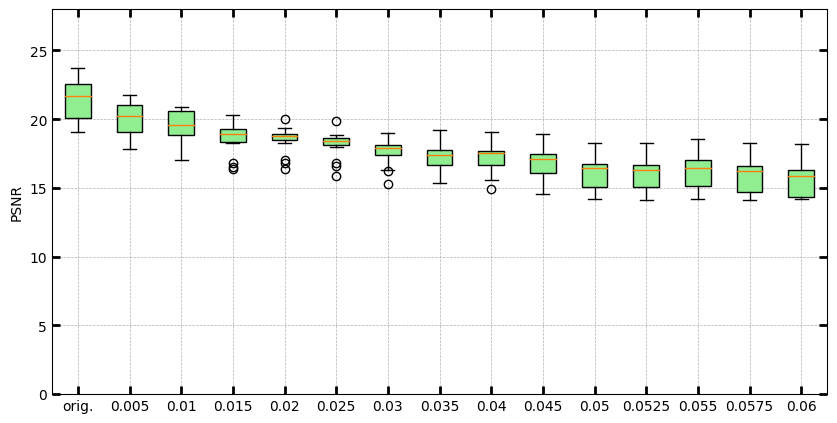

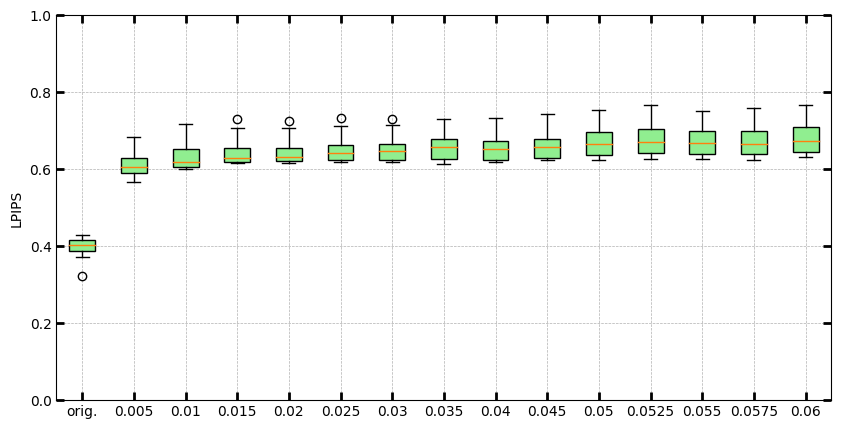

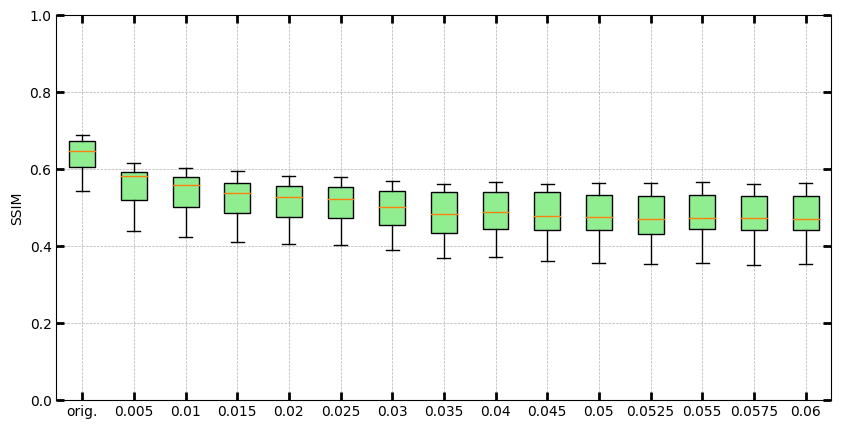

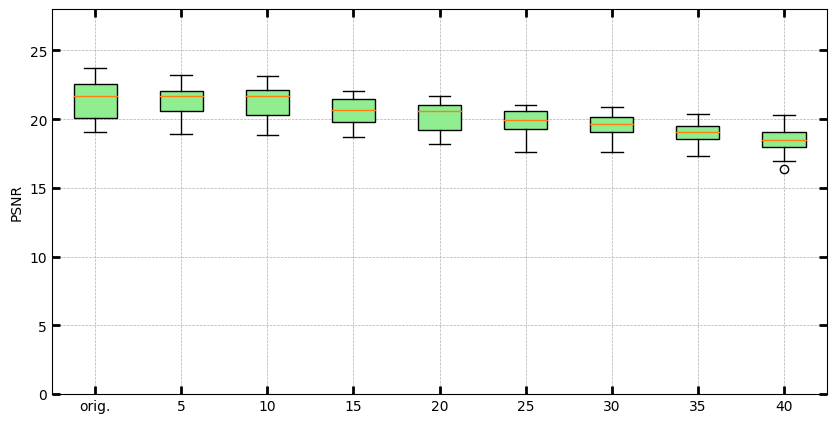

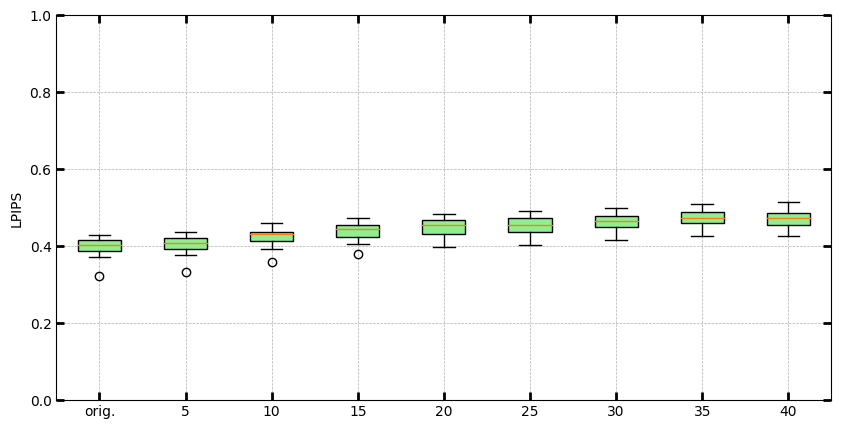

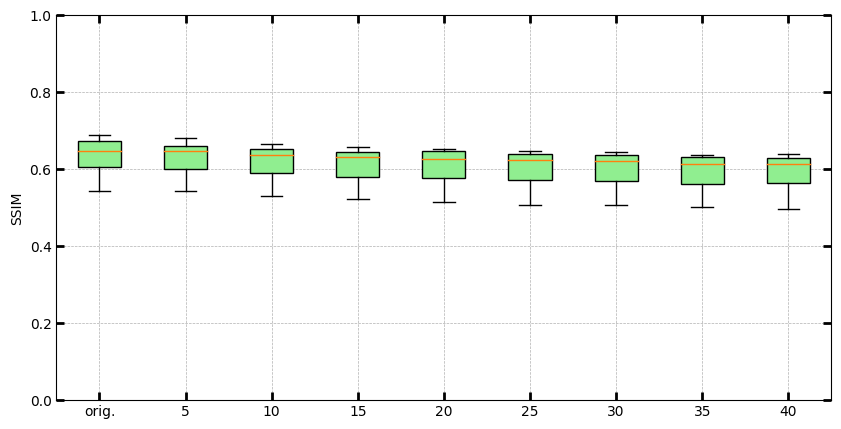

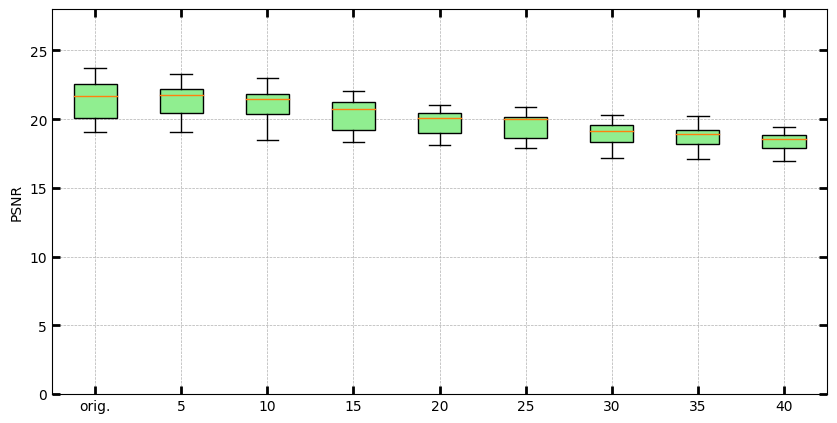

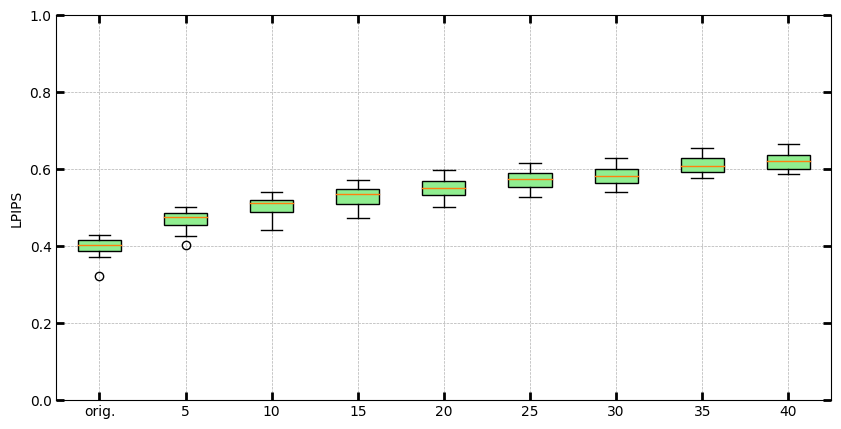

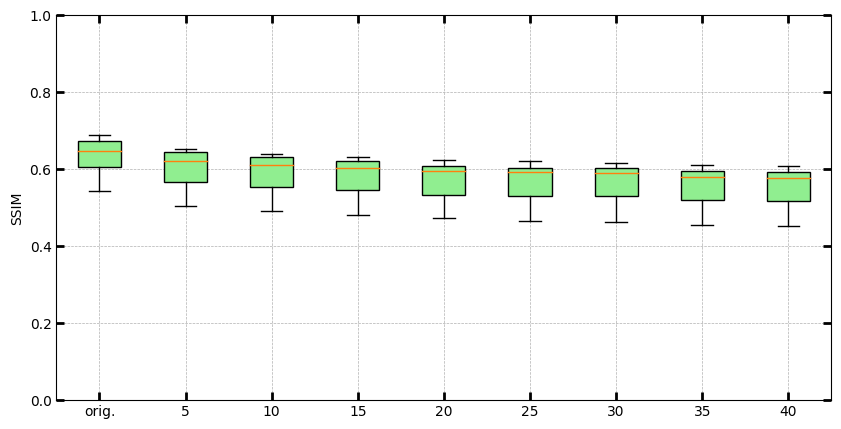

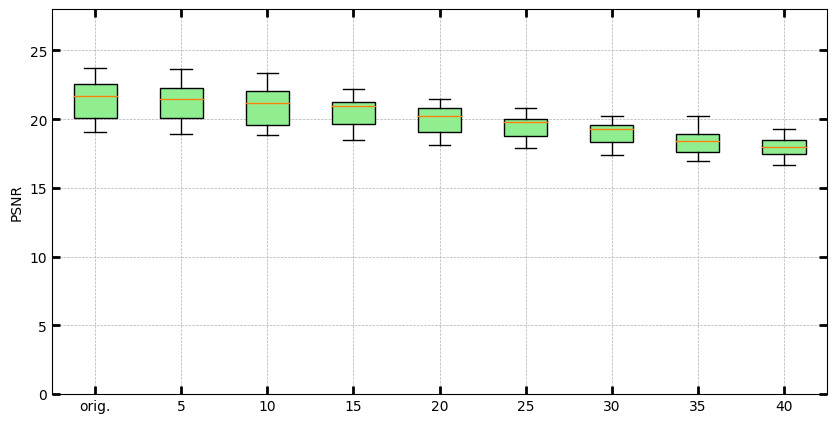

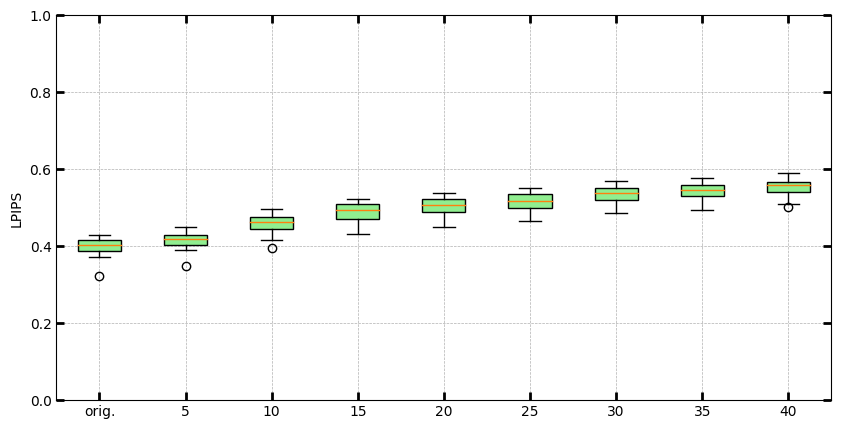

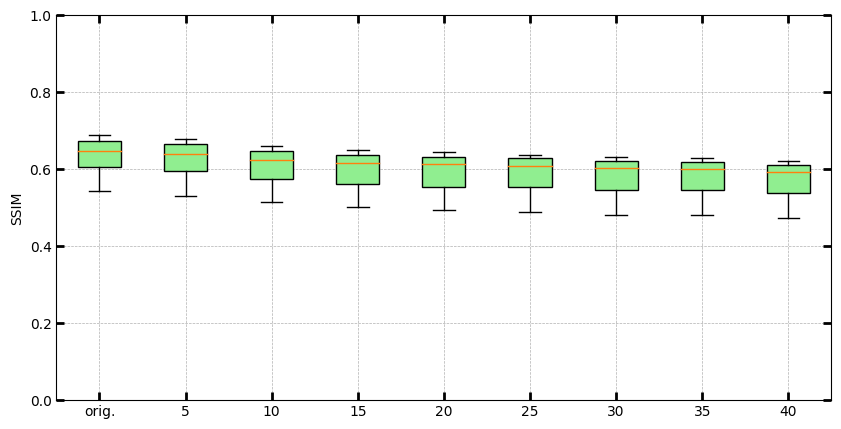

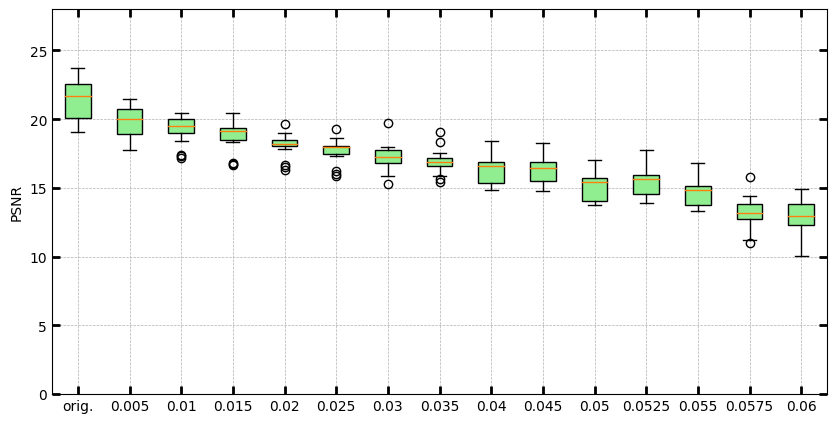

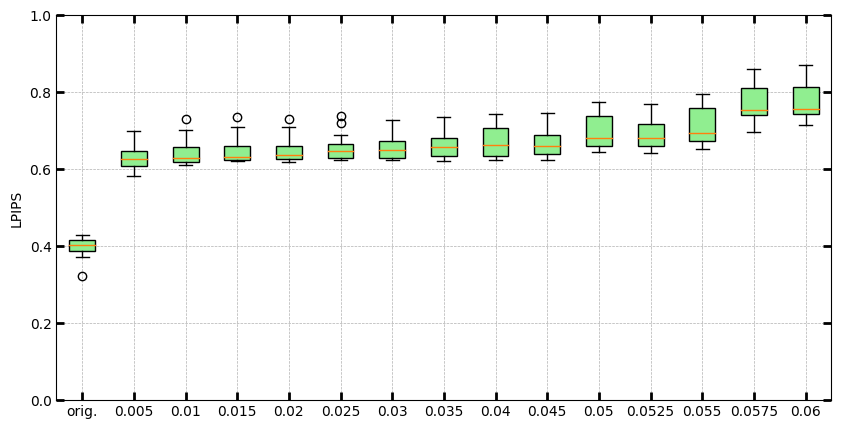

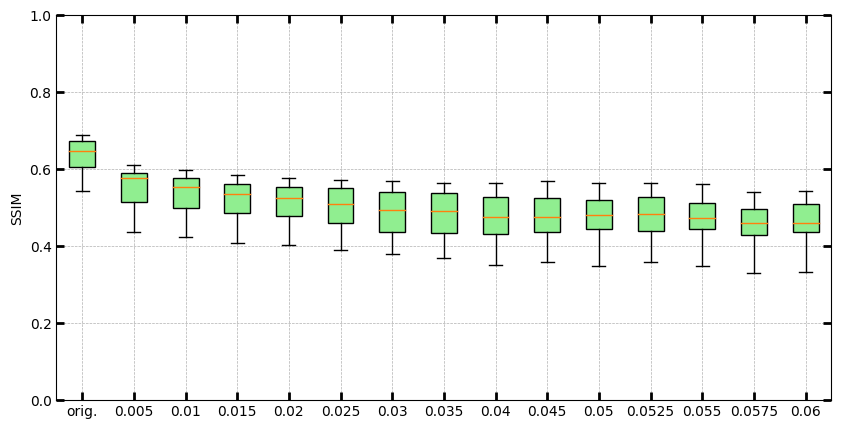

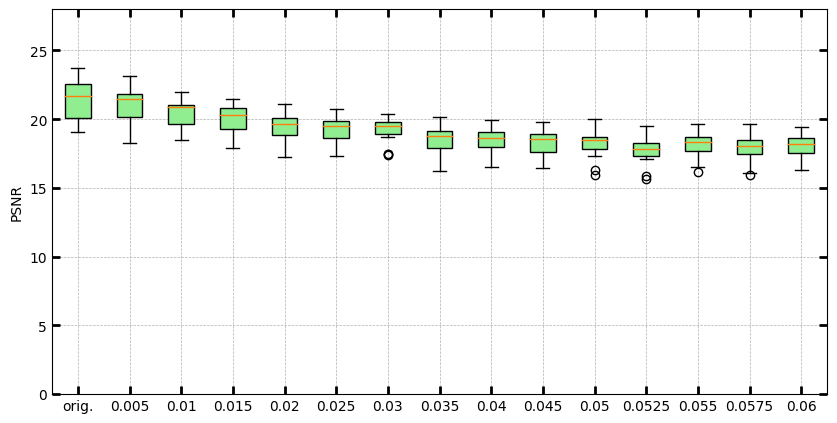

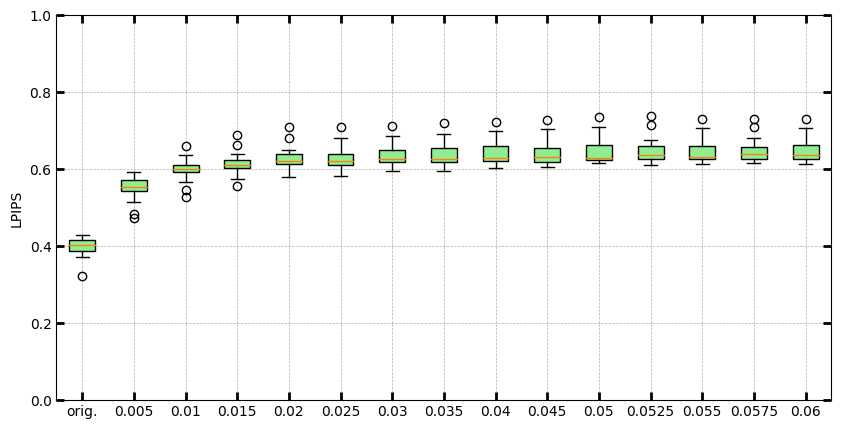

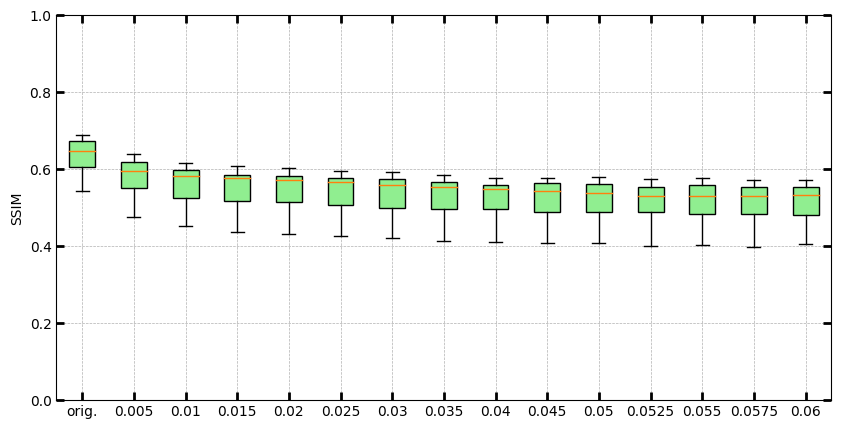

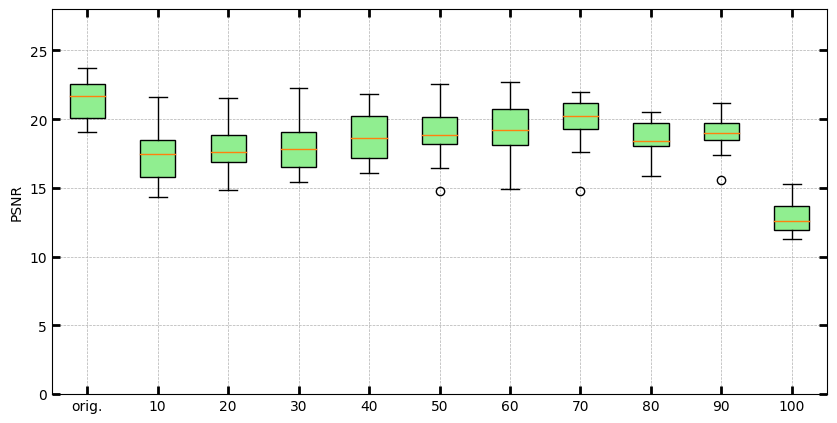

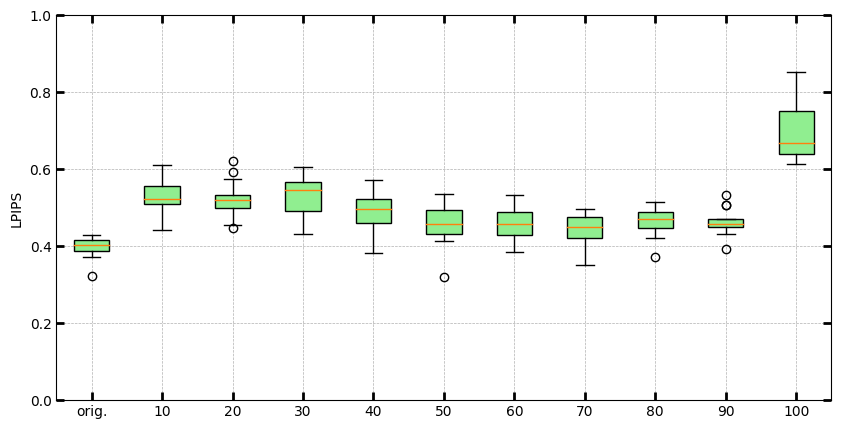

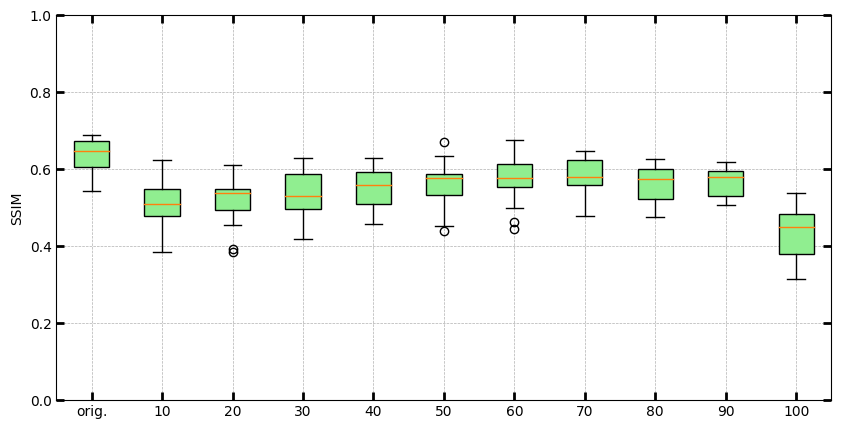

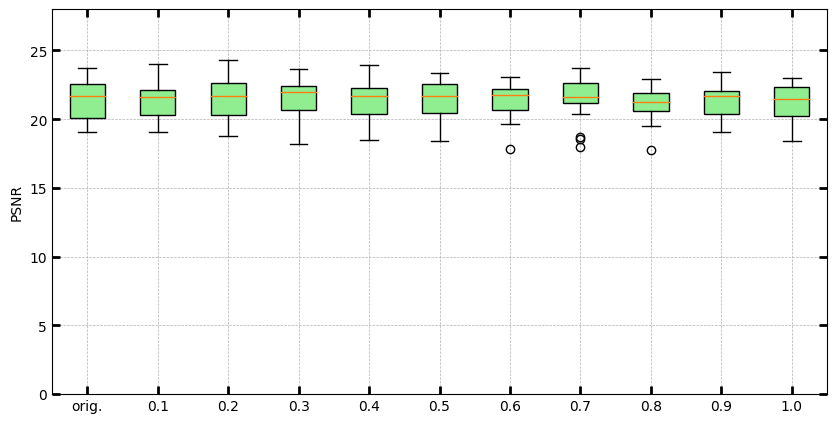

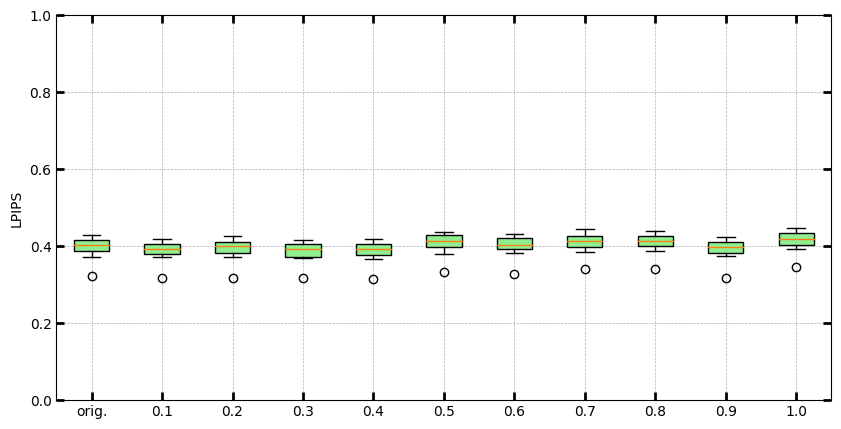

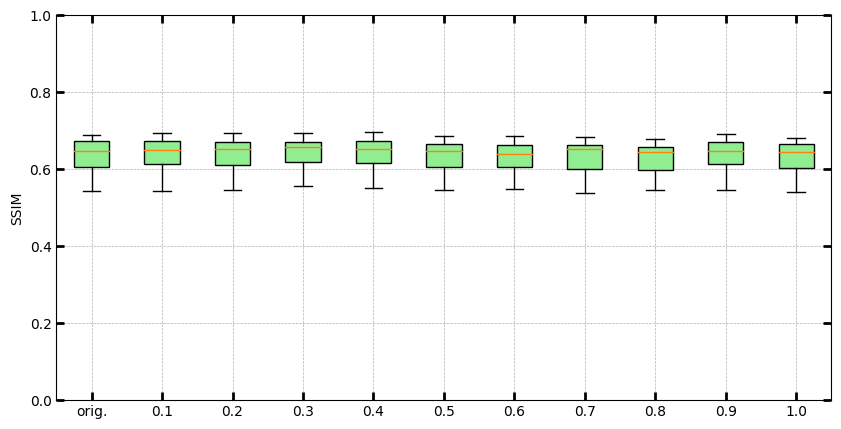

In [34]:
import os
save_dir = r'C:\Stuff\Results\plots\stump_ngp_opt_on_pdf'
config_name = os.path.basename(save_dir)

for type, metrics in types_dict.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]     
    
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]

        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'
    
    print(exp_name_joined)

    sorted_psnrs.insert(0, benchmark_psnr)
    sorted_lpips.insert(0, benchmark_lpips)
    sorted_ssims.insert(0, benchmark_ssim)
    sorted_names.insert(0, 'orig.')

    plt.figure(figsize=(10, 5))
    box = plt.boxplot(sorted_psnrs, labels=sorted_names, patch_artist=True)  # Enable patch artist
    for patch in box['boxes']:  # Change color of each box
        patch.set_facecolor('lightgreen')
    plt.ylim(0, 28)  # Set y-axis limits
    plt.ylabel('PSNR')
    plt.tick_params(direction='in', length=6, width=2, colors='black',
                top=True, right=True, bottom=True, left=True)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.savefig(os.path.join(save_dir, f'{config_name}_PSNR_{exp_name_joined}.pdf'), format='pdf', dpi=300)
    # plt.savefig(os.path.join(save_dir, f'{config_name}_PSNR_{exp_name_joined}.png'), dpi=300)

    plt.figure(figsize=(10, 5))
    box = plt.boxplot(sorted_lpips, labels=sorted_names, patch_artist=True)  # Enable patch artist
    for patch in box['boxes']:  # Change color of each box
        patch.set_facecolor('lightgreen')
    plt.ylim(0, 1)  # Set y-axis limits
    plt.ylabel('LPIPS')
    plt.tick_params(direction='in', length=6, width=2, colors='black',
                top=True, right=True, bottom=True, left=True)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.savefig(os.path.join(save_dir, f'{config_name}_LPIPS_{exp_name_joined}.pdf'), format='pdf', dpi=300)

    plt.figure(figsize=(10, 5))
    box = plt.boxplot(sorted_ssims, labels=sorted_names, patch_artist=True)  # Enable patch artist
    for patch in box['boxes']:  # Change color of each box
        patch.set_facecolor('lightgreen')
    plt.ylim(0, 1)  # Set y-axis limits
    plt.ylabel('SSIM')
    plt.tick_params(direction='in', length=6, width=2, colors='black',
                top=True, right=True, bottom=True, left=True)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.savefig(os.path.join(save_dir, f'{config_name}_SSIM_{exp_name_joined}.pdf'), format='pdf', dpi=300)    
        



        

In [1]:
import os
from utils import get_title
def generate_latex_for_images(directory):
    # List all files in the provided directory
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    
    # LaTeX document header
    latex_document = r"""\documentclass{article}
\usepackage{graphicx}
\usepackage{caption}
\begin{document}
"""
    
    # Generate LaTeX code for each image file
    
    for image in image_files:
        if 'benchmark' not in image:
            # Escape underscores for LaTeX
            image_caption = image.replace('_', r'\_')
            # Build LaTeX figure code
            latex_figure = r"\begin{figure}[htb]" + "\n" + \
                        r"\centering" + "\n" + \
                        r"\includegraphics[width=\linewidth]{images/plots_pdfs/" + image + "}" + "\n" + \
                        r"\caption{" + get_title(image_caption) + "}" + "\n" + \
                        r"\end{figure}" + "\n\n"
            latex_document += latex_figure
    
    # LaTeX document footer
    latex_document += r"\end{document}"
    
    return latex_document

# The directory containing the images
image_directory = r'C:\Stuff\Results\plots\stump_ngp_opt_on_pdf'  # Replace with your actual directory path

# Generate the LaTeX document
latex_code = generate_latex_for_images(image_directory)

# Print the generated LaTeX code
print(latex_code)

\documentclass{article}
\usepackage{graphicx}
\usepackage{caption}
\begin{document}
\begin{figure}[htb]
\centering
\includegraphics[width=\linewidth]{images/plots_pdfs/stump_ngp_opt_on_pdf_LPIPS_stump-every.pdf}
\caption{Boxplot displaying the degradation results measured in LPIPS$\downarrow$ for the ``Reduced Image Set'' experiment. The Y-axis represents the LPIPS$\downarrow$ scores achieved, while the X-axis indicates the frequency of image selection (every 1/nth image) for inclusion in the training set. Instant-ngp model is used. Pose optimizer is enabled. Stump dataset is used. }
\end{figure}

\begin{figure}[htb]
\centering
\includegraphics[width=\linewidth]{images/plots_pdfs/stump_ngp_opt_on_pdf_LPIPS_stump-gamma.pdf}
\caption{Boxplot displaying the degradation results measured in LPIPS$\downarrow$ for the ``Gamma Correction'' experiment. The Y-axis represents the LPIPS$\downarrow$ scores achieved, while the X-axis indicates the percent of training images adjusted through gamma co

In [6]:
import os
from utils import get_title
def generate_latex_for_images(directory):
    # List all files in the provided directory
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    
    # LaTeX document header
    latex_document = r"""\documentclass{article}
\usepackage{graphicx}
\usepackage{caption}
\begin{document}
"""
    
    # Generate LaTeX code for each image file
    for image in image_files:
        # Escape underscores for LaTeX
        image_caption = image.replace('_', r'\_')
        # Build LaTeX figure code
        latex_figure = r"\begin{figure}[htb]" + "\n" + \
                    r"\centering" + "\n" + \
                    r"\includegraphics[width=\linewidth]{images/plots_20.03.2024/" + image + "}" + "\n" + \
                    r"\caption{" + get_title(image_caption) + "}" + "\n" + \
                    r"\end{figure}" + "\n\n"
        latex_document += latex_figure
    
    # LaTeX document footer
    latex_document += r"\end{document}"
    
    return latex_document

# The directory containing the images
image_directory = r'C:\Stuff\Results\plots\stump_ngp_opt_on'  # Replace with your actual directory path

# Generate the LaTeX document
latex_code = generate_latex_for_images(image_directory)

# Print the generated LaTeX code
print(latex_code)

\documentclass{article}
\usepackage{graphicx}
\usepackage{caption}
\begin{document}
\begin{figure}[htb]
\centering
\includegraphics[width=\linewidth]{images/plots_20.03.2024/stump_ngp_opt_on_LPIPS_benchmark.png}
\caption{Results of reconstruction quality measured in LPIPS for the ``Benchmark'' experiment, where original dataset without any degradations is used. The Y-axis represents the LPIPS scores achieved. Instant-ngp model is used. Pose optimizer is enabled. }
\end{figure}

\begin{figure}[htb]
\centering
\includegraphics[width=\linewidth]{images/plots_20.03.2024/stump_ngp_opt_on_LPIPS_stump-every.png}
\caption{Boxplot displaying the degradation results measured in LPIPS for the ``Reduced Image Set'' experiment. The Y-axis represents the LPIPS scores achieved, while the X-axis indicates the frequency of image selection (every 1/nth image) for inclusion in the training set. Instant-ngp model is used. Pose optimizer is enabled. }
\end{figure}

\begin{figure}[htb]
\centering
\includegr